In [86]:
import pandas as pd
import pylab as pl
import numpy as np
import statsmodels.formula.api as sm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## reading in data for MTA Washington DC ridership 

In [71]:
ridWC = pd.read_csv("MTA_Average_Weekday_Ridership_-_by_Month.csv")

In [72]:
ridWC.head()

,Month,Bus,Metro,Light Rail,Mobility,Taxi Access,MARC Total,MARC - Brunswick,MARC - Camden,MARC - Penn,Commuter Bus Total,CB - Baltimore,CB - Washington,CB - ICC,Total Average Weekday Ridership
0,Jul-06,205015,43358,22997,2838,1072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275280
1,Aug-06,215455,44427,22708,2860,1162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286612
2,Sep-06,251719,44062,24085,2985,1211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,324062
3,Oct-06,251749,45510,22773,3055,1184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,324271
4,Nov-06,247152,43469,22846,2997,1192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,317656


In [73]:
ridWC.tail()

,Month,Bus,Metro,Light Rail,Mobility,Taxi Access,MARC Total,MARC - Brunswick,MARC - Camden,MARC - Penn,Commuter Bus Total,CB - Baltimore,CB - Washington,CB - ICC,Total Average Weekday Ridership
127,Feb-17,223160,37428,20202,5911,1898,32709.0,7084.0,4110.0,21515.0,16061.0,1181.0,14049.0,832.0,317167
128,Mar-17,214454,34319,22669,6551,2413,32669.0,6824.0,4186.0,21659.0,15741.0,1174.0,13725.0,843.0,306147
129,Apr-17,216823,36558,23613,6088,2184,35163.0,7114.0,4575.0,23475.0,15431.0,1114.0,13422.0,895.0,275689
130,May-17,228239,36684,20547,6934,2234,35737.0,7333.0,4896.0,23508.0,15596.0,1139.0,13567.0,890.0,345970
131,Jun-17,226701,39484,23981,6700,22858,36448.0,7497.0,4684.0,24267.0,15447.0,1110.0,13450.0,887.0,351046


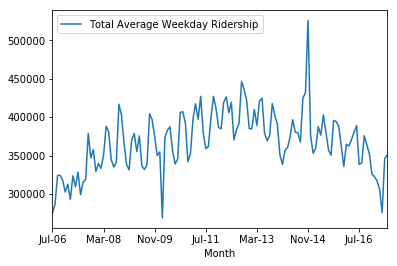

Figure 1. Total ridership on Washington DC MTA July06-Junw2017, monthly cadence


In [42]:
ridWC.plot(x="Month", y="Total Average Weekday Ridership")
pl.show()
print("Figure 1. Total ridership on Washington DC MTA July06-Junw2017, monthly cadence")

In [43]:
ridWC.Month[ridWC["Total Average Weekday Ridership"] == 
           ridWC["Total Average Weekday Ridership"].min()]

43    Feb-10
Name: Month, dtype: object

A google search for 
    "Washington DC February 2010 events"
    
returns [the following](https://en.wikipedia.org/wiki/February_5%E2%80%936,_2010_North_American_blizzard) as the second result:

    February 5–6, 2010 North American blizzard

    From Wikipedia, the free encyclopedia

    The February 5–6, 2010 North American blizzard, commonly referred to as Snowmageddon,[1] was a paralyzing and crippling blizzard that had major and widespread impact in the Northeastern United States. The storm's center tracked from Baja California Sur on February 2nd, 2010 to the East coast on February 6, 2010, before heading east out into the Atlantic. Effects were felt to the north and west of this track in northern Mexico, California, and the Southwestern, Midwestern, Southeastern, and most notably Mid-Atlantic States. Severe weather, including extensive flooding and landslides in Mexico, and historic snowfall totals in every one of the Mid-Atlantic states, brought deaths to Mexico, New Mexico, Virginia, Pennsylvania and Maryland.[2]



we interpret the first most significant event (drop in ridership) as the consequence of Snowmageddon

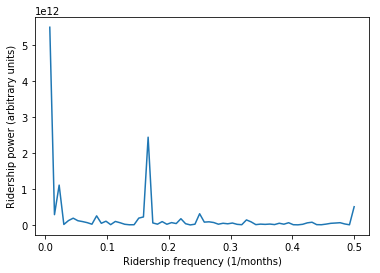

Figure 2: power spectrum of ridership: the power spectrum reveals the periodicity of Washington DC ridership:
Maximum periodicity: 6.0 months


In [57]:
ridPower = np.abs(np.fft.rfft(ridWC["Total Average Weekday Ridership"])**2)

time_step = 1 

freqs = np.fft.rfftfreq(len(ridWC), time_step)

plt.plot(freqs[1:], ridPower[1:])
pl.ylabel("Ridership power (arbitrary units)")
pl.xlabel("Ridership frequency (1/months)");
pl.show()
print ("Figure 2: power spectrum of ridership: " + 
       "the power spectrum reveals the periodicity of Washington DC ridership:")
print ("Maximum periodicity: %.1f months"%(
        1.0 / freqs[2:][ridPower[2:] == ridPower[2:].max()]))

In [58]:
ridWC.describe()

,Bus,Metro,Light Rail,Mobility,Taxi Access,MARC Total,MARC - Brunswick,MARC - Camden,MARC - Penn,Commuter Bus Total,CB - Baltimore,CB - Washington,CB - ICC,Total Average Weekday Ridership
count,132.000000,132.000000,132.000000,132.000000,132.000000,120.000000,120.000000,120.000000,120.000000,78.000000,78.000000,78.000000,76.000000,132.000000
mean,249869.522727,45635.795455,25467.439394,4945.121212,1488.795455,33864.475000,7375.433333,4369.125000,22116.158333,16038.179487,1321.794872,14107.153846,625.236842,367755.409091
std,22914.043613,5022.637236,3167.085742,1278.421152,1913.814116,2499.516847,491.341496,388.030614,2072.194688,1513.384740,152.356073,1497.680155,267.948247,39304.657042
min,174809.000000,29987.000000,18198.000000,2783.000000,579.000000,28360.000000,5766.000000,3133.000000,18104.000000,12040.000000,994.000000,10353.000000,23.000000,268857.000000
25%,232325.000000,43320.250000,23315.000000,3809.750000,985.250000,32122.000000,7088.500000,4175.250000,20724.250000,15438.000000,1171.750000,13543.500000,482.500000,340129.750000
50%,248375.500000,46256.000000,25423.000000,5071.500000,1284.500000,33517.000000,7459.000000,4413.500000,21649.500000,16064.000000,1360.000000,14107.500000,678.500000,370462.500000
75%,266294.250000,49245.750000,27798.000000,6134.000000,1672.500000,35808.250000,7706.750000,4598.500000,23809.500000,17021.250000,1442.500000,14925.250000,850.750000,391942.000000
max,300618.000000,55839.000000,36519.000000,6934.000000,22858.000000,38946.000000,8316.000000,5358.000000,26567.000000,20071.000000,1727.000000,18263.000000,988.000000,526095.000000


removing modes of tranportation that are not complete

In [91]:
ridWC = ridWC[["Month", "Bus","Metro","Light Rail","Mobility","Taxi Access"]]

In [83]:
ridWC.head()

,Month,Bus,Metro,Light Rail,Mobility,Taxi Access
0,Jul-06,205015,43358,22997,2838,1072
1,Aug-06,215455,44427,22708,2860,1162
2,Sep-06,251719,44062,24085,2985,1211
3,Oct-06,251749,45510,22773,3055,1184
4,Nov-06,247152,43469,22846,2997,1192


Bus
Metro
Light Rail
Mobility
Taxi Access


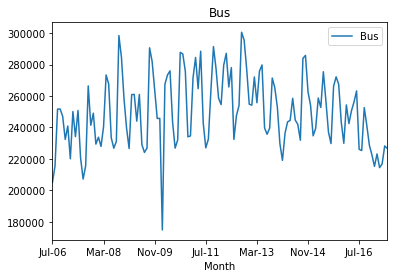

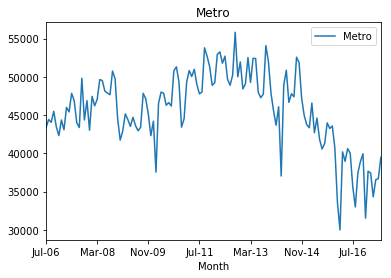

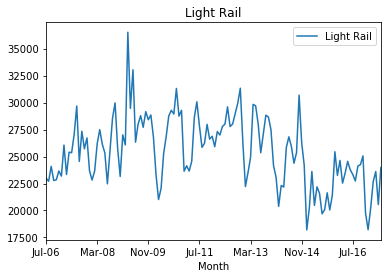

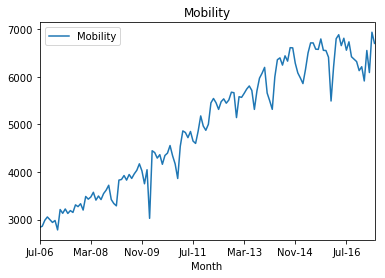

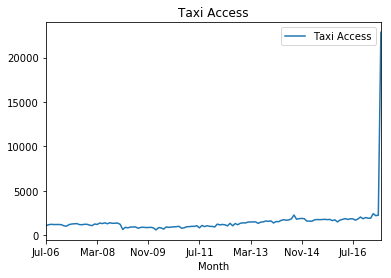

In [84]:
for c in ridWC.columns:
    if c == "Month": continue
    ax = pl.figure().add_subplot(111)
    ridWC.plot(x="Month", y=c, ax=ax)
    ax.set_title(c)

In [92]:
ridWC["muteindex"] = np.arange(len(ridWC))
ridWC.head()

/Users/fbianco/Library/Enthought/Canopy_64bit/User/envs/p3env/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Month,Bus,Metro,Light Rail,Mobility,Taxi Access,muteindex
0,Jul-06,205015,43358,22997,2838,1072,0
1,Aug-06,215455,44427,22708,2860,1162,1
2,Sep-06,251719,44062,24085,2985,1211,2
3,Oct-06,251749,45510,22773,3055,1184,3
4,Nov-06,247152,43469,22846,2997,1192,4


In [94]:
ridWC.rename(columns = {"Light Rail":"LightRail",
                        "Taxi Access":"TaxiAccess"}, inplace=True)

/Users/fbianco/Library/Enthought/Canopy_64bit/User/envs/p3env/lib/python3.6/site-packages/pandas/core/frame.py:2844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [93]:
for c in ridWC.columns:
    if c == "Month": continue
    print ("%s ~ muteindex"%c)
    sm.ols(formula="%s ~ muteindex"%c, data=ridWC)

Bus ~ muteindex
Metro ~ muteindex
Light Rail ~ muteindex


SyntaxError: invalid syntax (<unknown>, line 1)

Figure 1. Total ridership on Washington DC MTA July06-Junw2017, monthly cadence


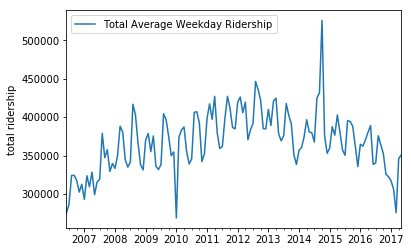

In [27]:
ax = ridWC.plot(x = pd.date_range(start = "2006-06-01", end="2017-06-01",
                                  freq='m'), 
           y="Total Average Weekday Ridership")
ax.set_ylabel("total ridership")
print("Figure 1. Total ridership on Washington DC MTA July06-Junw2017, monthly cadence")

In [37]:
ridWC.Month[ridWC["Total Average Weekday Ridership"] == 
ridWC["Total Average Weekday Ridership"].min()]

43    Feb-10
Name: Month, dtype: object

In [34]:
ax = ridWC.plot(x = pd.date_range(start = "2006-06-01", end="2017-06-01",
                                  freq='m'), 
           y="Total Average Weekday Ridership")
ax.set_ylabel("total ridership")
print("Figure 1. Total ridership on Washington DC MTA July06-Junw2017, monthly cadence")

TypeError: unsupported operand type(s) for &: 'Timestamp' and 'DatetimeIndex'

In [33]:
pd.to_datetime("2009-06-30")

Timestamp('2009-06-30 00:00:00')